In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 


/home/kr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


The MNIST data is a large dataset of handwritten numerical digits. More about the dataset: https://en.wikipedia.org/wiki/MNIST_database
        

The digits in the images are centred and scaled (similar sized).
We proceed by loading the data.

In [4]:
def load_data():
  # Load training and eval data
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images # Returns np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    test_data = mnist.test.images # Returns np.array
    test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    return train_data, train_labels, test_data, test_labels

In [5]:
train_data, train_labels, test_data, test_labels = load_data()

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# What's the size of the training data?
# train_data.shape

Lets visualise a datapoint, an image in the dataset

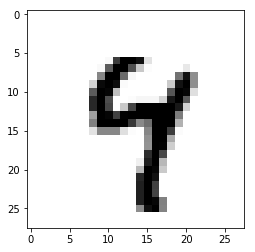

In [7]:
some_digit = train_data[2]
some_digit_image = some_digit.reshape(28,28) # reshape to square
plt.imshow(some_digit_image,cmap = plt.cm.binary,interpolation="nearest")
# plt.axis("off")
plt.show()

Machine learning algorithms that coud be used for the problem:

Logistic Regression

Random Forest

SVM

k-Nearest Neighbours

.

.

.

n. Neural Networks- Feed-forward, Convolutional, Dense Convolutional, RNNs 

But which one?

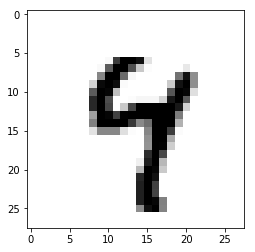

In [8]:
b = some_digit_image

plt.imshow(b,cmap = plt.cm.binary,interpolation="nearest")
# plt.axis("off")
plt.show()



Convolutional neural network the neural network structure is

    Input Layer
    Covolution layer (5*5 feature detector, 32 output)
    2*2 max pooling
    Covolution layer (5*5 feature detector, 64 output)
    2*2 max pooling
    full connect layers : say 1 layer for now.
    dropout layer
    softmax the outcome



We would like to process our labels in a one-hot encoding so that our predictions that would be 'probabilities' across the range of digits


In [11]:
train_labels_reshaped = train_labels.reshape(-1,1)
test_labels_reshaped = test_labels.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_L = enc.fit_transform(train_labels_reshaped).toarray()
test_L = enc.transform(test_labels_reshaped).toarray()

In [12]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(tf.float32, [None,784])
    Y = tf.placeholder(tf.float32,[None,10])
    X_ = tf.reshape(X,[-1,28,28,1]) 
    # for convolution. This operation would not be required if we plan to use just a feed-fwd network
    
    dropout_prob = tf.placeholder(tf.float32)
    #dropout is a technique to avoid overfitting. A probability parameter is required for the same.
    #arguments are passed in the computational graph via a placeholder.
    #So far, X, Y, dropout_prob make use of the  placeholder.
    lr = tf.placeholder(tf.float32)
    
    F1 = 32 #num of filters/kernels/convolutions in 1st layer
    F2 = 64 #num of filters/kernels/convolutions in 2nd layer

    
    C1 = tf.Variable(tf.truncated_normal([5,5,1,F1], 0, 0.1, tf.float32))
    B1 = tf.Variable(tf.ones([F1])/10)
    
    C2 = tf.Variable(tf.truncated_normal([5,5,F1,F2], 0, 0.1, tf.float32))
    B2 = tf.Variable(tf.ones([F2])/10)
    
    W3 = tf.Variable(tf.truncated_normal([7*7*F2,10], 0, 0.1, tf.float32))
    B3 = tf.Variable(tf.ones([10])/10)

   
    #stride of 1 for both convolutions
    L1 = tf.nn.relu(tf.nn.conv2d(X_, C1, strides=[1,1,1,1], padding='SAME') + B1)
    L1_ = tf.nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    L2 = tf.nn.relu(tf.nn.conv2d(L1_, C2, strides=[1,1,1,1], padding='SAME') + B2)
    L2_ = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding='SAME')
    
    L3 = tf.reshape(L2_,shape=[-1,7*7*F2])
    
    #################1 feed fwd layer. No activation since the last layer.
    L4 = tf.matmul(L3, W3) + B3
    L = tf.nn.softmax(L4)    
    #for each data-point, L would be a 10-sized array of estimated probabilities for each digit
    #################

    #LOSS
    crossE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=L4, labels=Y))
    
    correct_prediction = tf.equal(tf.argmax(L,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    optimizer = tf.train.AdamOptimizer(lr)
    train_step = optimizer.minimize(crossE)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [18]:
bc = np.reshape(b, [784])

In [13]:
import math
# check_data = train_data[:5]
# check_L = train_L[:5]
# bb = tf.reshape(b, shape = [784])
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    builder = tf.saved_model.builder.SavedModelBuilder()
    
    batch_size = 100
    epochs = 10
    iterations = int(train_data.shape[0]/batch_size)
    batch_num = 0
    
    max_learning_rate = 0.004
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = max_learning_rate
    
    for i in range(epochs):
        print("LR: ",learning_rate)
        for j in range(iterations):
            batch_num +=1
            start_idx = (i * batch_size) % (train_data.shape[0] - batch_size)
            end_idx = start_idx + batch_size
            
            x_train = train_data[start_idx:end_idx]
            y_train = train_L[start_idx:end_idx]
            
            learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-batch_num/decay_speed)

            x = sess.run(train_step, feed_dict = {X:x_train, Y:y_train, dropout_prob: 0.5, lr: learning_rate})
        print ("Epoch"+str(i+1))
#         print ("batch: "+ str(batch_num+1))
        ans=sess.run(accuracy,feed_dict={X:test_data,Y:test_L,dropout_prob:1,lr:learning_rate}) # evaluate the testing dataset.
        print("ACCURACY: ", ans)
#         ans2 = sess.run(L1_, feed_dict = {X:[bc], Y: check_L[2:3], dropout_prob:1, lr: learning_rate})
#         checks = sess.run(L, feed_dict={X:check_data, Y: check_L, dropout_prob:1,lr: learning_rate})
#         print (checks)
#         check = sess.run(L6, feed_dict={X:[bc], Y: check_L[2:3], dropout_prob:1,lr: learning_rate})
#         print (check)
        
    

LR:  0.004
Epoch1
ACCURACY:  0.794
LR:  0.003062331280577377
Epoch2
ACCURACY:  0.7607
LR:  0.002350104260483898
Epoch3
ACCURACY:  0.8521
LR:  0.0018091164706133022
Epoch4
ACCURACY:  0.8786
LR:  0.0013981972264225104
Epoch5
ACCURACY:  0.8898
LR:  0.0010860744236385112
Epoch6
ACCURACY:  0.8873
LR:  0.0008489946436209412
Epoch7
ACCURACY:  0.9022
LR:  0.0006689154517392868
Epoch8
ACCURACY:  0.9163
LR:  0.0005321323176131021
Epoch9
ACCURACY:  0.9137
LR:  0.0004282356620035104
Epoch10
ACCURACY:  0.9295


In [17]:
g.get_operations()

[<tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'Reshape/shape' type=Const>,
 <tf.Operation 'Reshape' type=Reshape>,
 <tf.Operation 'Placeholder_2' type=Placeholder>,
 <tf.Operation 'Placeholder_3' type=Placeholder>,
 <tf.Operation 'truncated_normal/shape' type=Const>,
 <tf.Operation 'truncated_normal/mean' type=Const>,
 <tf.Operation 'truncated_normal/stddev' type=Const>,
 <tf.Operation 'truncated_normal/TruncatedNormal' type=TruncatedNormal>,
 <tf.Operation 'truncated_normal/mul' type=Mul>,
 <tf.Operation 'truncated_normal' type=Add>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'ones/shape_as_tensor' type=Const>,
 <tf.Operation 'ones/Const' type=Const>,
 <tf.Operation 'ones' type=Fill>,
 <tf.Operation 'truediv/y' type=Const>,
 <tf.Operation 'truediv' type=RealDiv>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <

## WIP: Predicting, Saving, Showcasing strengths and weaknesses 